## Supervised

In [3]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import sparse
import mglearn
import sklearn

### KNN

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


test_set predict: [1 0 1 0 1 0 0]
test_set accuracy: 0.86


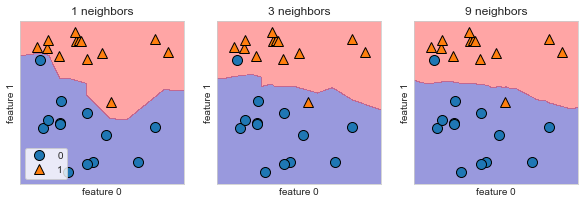

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
# model setting
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
# pred, acc
print('test_set predict:',clf.predict(X_test))
print('test_set accuracy: {:.2f}'.format(clf.score(X_test,y_test)))

# visualization. decision boundry
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

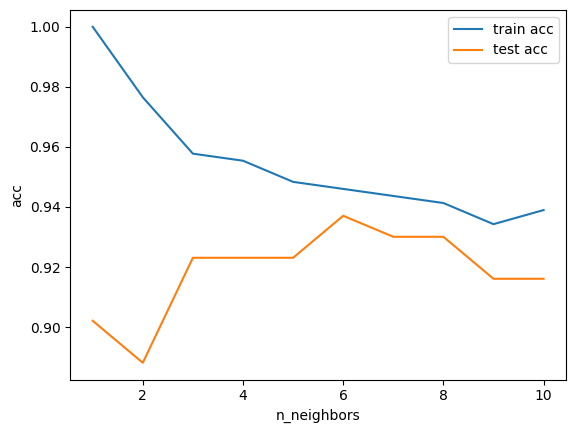

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# KNN_Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_acc = []
test_acc = []

neighbors_setting = range(1,11)

from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc, label='train acc')
plt.plot(neighbors_setting,test_acc,label='test acc')
plt.ylabel('acc')
plt.xlabel('n_neighbors')
plt.legend(); plt.show()

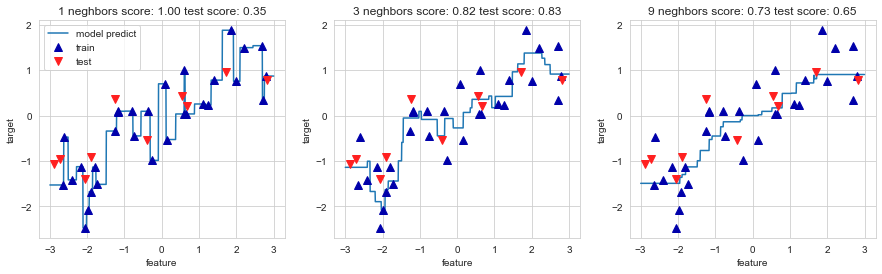

In [15]:
# KNN_Regressor
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neghbors score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predict", "train", "test"], loc="best")
plt.show()

### linear model

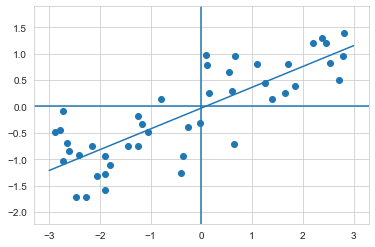

In [48]:
# Linear_Regression
from sklearn.linear_model import LinearRegression
    # data split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # model select
lr = LinearRegression().fit(X_train, y_train)

    # visualization
plt.scatter(X_train,y_train); plt.axvline(); plt.axhline(); plt.ylim(min(y_train)-0.5,max(y_train)+0.5)
xt=np.linspace(-3,3,100)
yt= lr.coef_*xt + lr.intercept_ # == w*x + b
plt.plot(xt,yt)

In [35]:
# multi feature linear regression
from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print('train set acc: \n',lr.score(X_train,y_train))
print('test set acc: \n', lr.score(X_test,y_test))

train set acc: 
 0.9520519609032728
test set acc: 
 0.6074721959665788


c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

train_set score: 0.89
test_set score: 0.75
train_set score: 0.79
test_set score: 0.64
train_set score: 0.93
test_set score: 0.77


c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

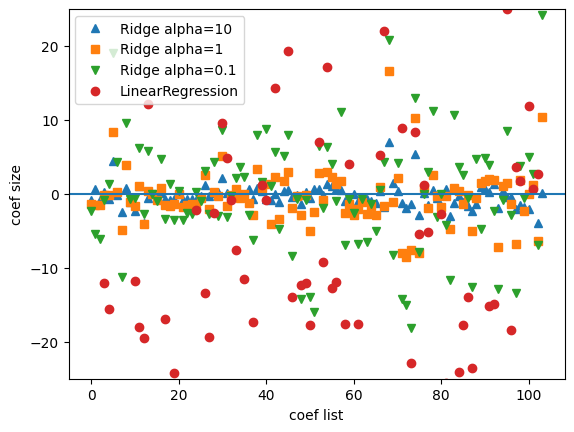

In [38]:
# linear model complex control - Ridge(L2 regularization)
    # L2 reg = minimize the abs(w)
    #        = MSE + alpha * sum[j=1 to m]((w_j)^2)
    #        = bigger alpha > bigger regularization
    # default alpha value = 1.0
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

ridge = Ridge().fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train_set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test_set score: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef list"); plt.ylabel("coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-25, 25)
plt.legend(); plt.show()  

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

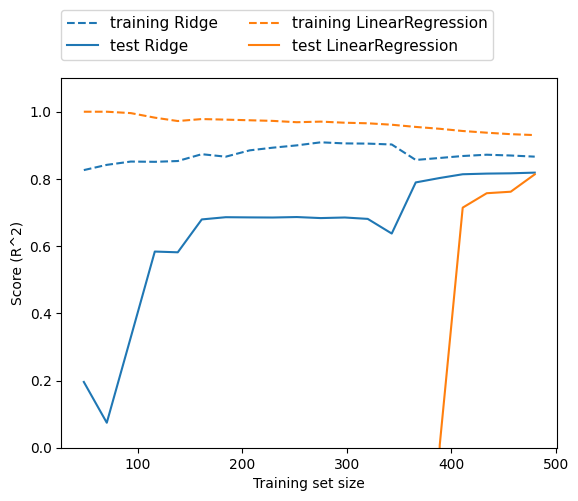

In [36]:
# alpha값을 고정하고 train set의 크기를 변화 시켜 모델의 성능 변화를 확인해보자 = 학습곡선(learning curve)
mglearn.plots.plot_ridge_n_samples()

train_set score: 0.29
test_set score: 0.21
using feature count: 4
train_set score: 0.90
test_set score: 0.77
using feature count: 33
train_set score: 0.95
test_set score: 0.64
using feature count: 96


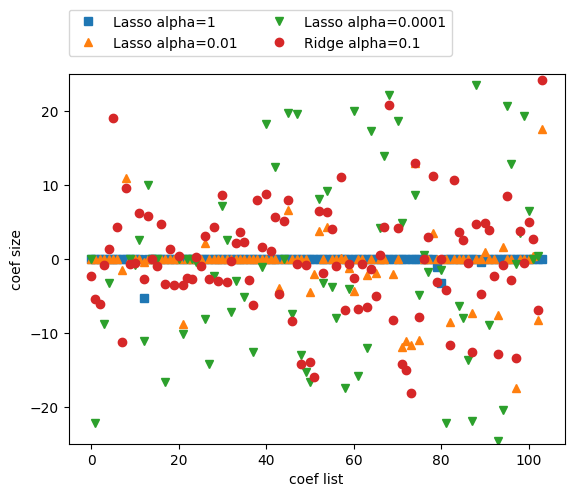

In [40]:
# linear model complex control - Lasso(L1 regularization)
    # L1 reg = minimize the abs(w). but somethimes make w to 0
    #        = MSE + alpha * sum[j=1 to m](abs(w_j))
    #        = bigger alpha > bigger regularization
    # default alpha value = 1.0
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("using feature count:", np.sum(lasso.coef_ != 0)) # count인데 왜 sum인지는 잘 모르겠음

lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("using feature count:", np.sum(lasso001.coef_ != 0))

lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("train_set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test_set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("using feature count:", np.sum(lasso00001.coef_ != 0))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list"); plt.ylabel("coef size")
plt.show()

linear model for classification

y_pred > 0 -> 1
y_pred < 0 -> 0

in every linear model for classifier

decision boundary gonna input linear func

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


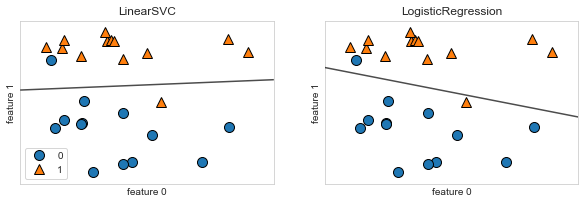

In [53]:
# linear model for classification - Logistic Regression & Suppor Vector Machine
# use L2 regularization
# L2 parameter == C
# small C big reg. big C small reg.
# default C value = 1 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

train_set score: 0.958
test_set score: 0.958
train_set score: 0.981
test_set score: 0.965
train_set score: 0.953
test_set score: 0.951


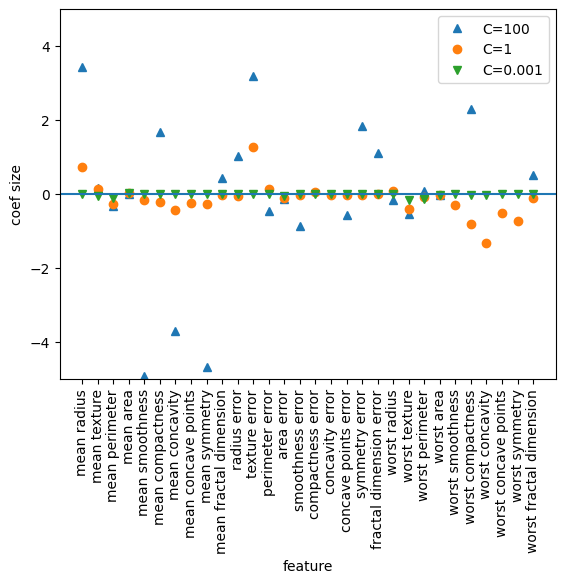

In [42]:
# linear model for classification - Logistic regression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("train_set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test_set score: {:.3f}".format(logreg001.score(X_test, y_test)))

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-5, 5)
plt.xlabel("feature"); plt.ylabel("coef size")
plt.legend(); plt.show()  #  C는 반대로 작을수록 규제 강화 l2규제 사용

C=0.001 l1 logistic regression train acc: 0.91
C=0.001 l1 logistic regression test acc: 0.92
C=1.000 l1 logistic regression train acc: 0.96
C=1.000 l1 logistic regression test acc: 0.96
C=100.000 l1 logistic regression train acc: 0.99
C=100.000 l1 logistic regression test acc: 0.98


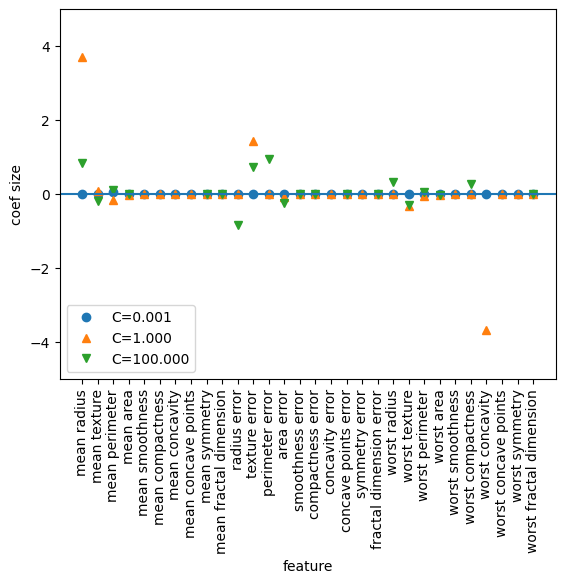

In [43]:
# Logistic Regression에 L1 규제 적용하기
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver = 'liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} l1 logistic regression train acc: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} l1 logistic regression test acc: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims= plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel('coef size')
plt.ylim(-5,5)
plt.legend(loc=3)

coef list size:  (3, 2)
intercept list size:  (3,)
-0.1749288753305836 0.23140820524431566
0.47621557418620597 -0.06936997023316215
-0.1891418735749653 -0.2040047648239975


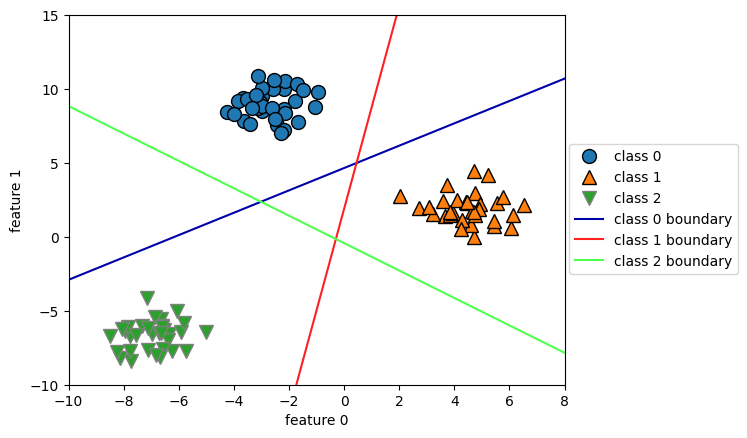

In [47]:
# multi class classifier by linear model - one-vs-rest
#    most of linear models (except logistic regression) only support binary classifier 
#    so use one-vs-rest method. 
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

    # LinearSVC train
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("coef list size: ", linear_svm.coef_.shape)
print("intercept list size: ", linear_svm.intercept_.shape)

    # visualization of three binary classifier
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    #          x , -(x*w_1 + b)/ w_2
    print(coef[0],coef[1])

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary',
            'class 2 boundary'], loc=(1.01, 0.3))
plt.show()

Text(0, 0.5, 'feature 1')

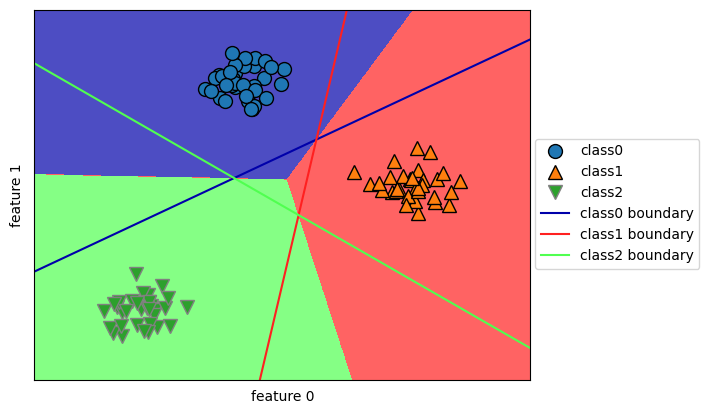

In [50]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['class0','class1','class2','class0 boundary','class1 boundary','class2 boundary'],loc=(1.01,0.3))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### Decision Tree

train_set score: 1.000
test_set socore: 0.937
train_set score: 0.988
test_set score: 0.951


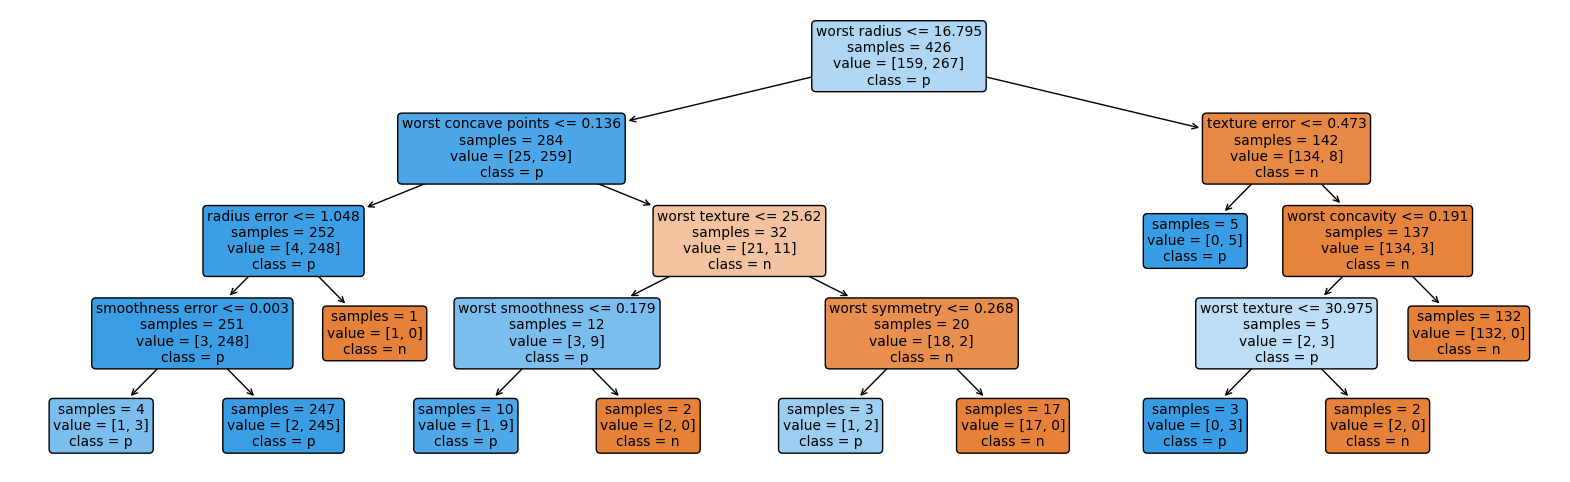

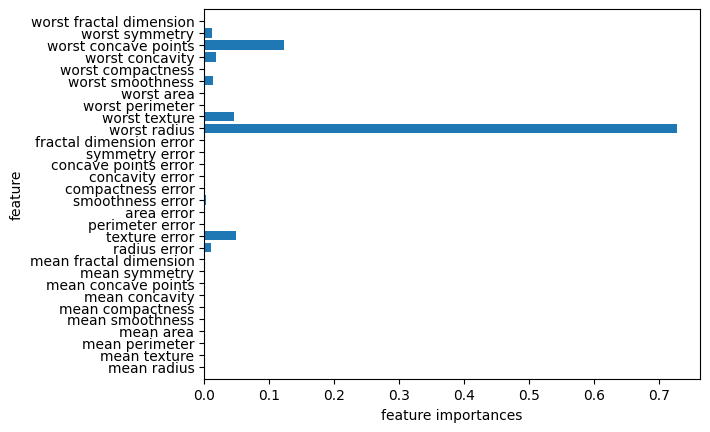

In [53]:
# Decision Tree - Classifier

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train_set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test_set socore: {:.3f}".format(tree.score(X_test, y_test)))
    # all of leaf nodes are pure node. == overfitting

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("train_set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test_set score: {:.3f}".format(tree.score(X_test, y_test)))
    # you can apply post pruning by using the parameter 'ccp_alpha'

from sklearn.tree import plot_tree
plt.figure(figsize=(20,6))
plot_tree(tree, class_names=["n", "p"], feature_names=cancer.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

# Decision Tree classifier - feature_importance_

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)
# it isnt mean that low feature_importance_ value is usless
# just tree isnt choose that feature. or another feature might have a same information.
# so, important feature is important, but don't know what is mean of it.

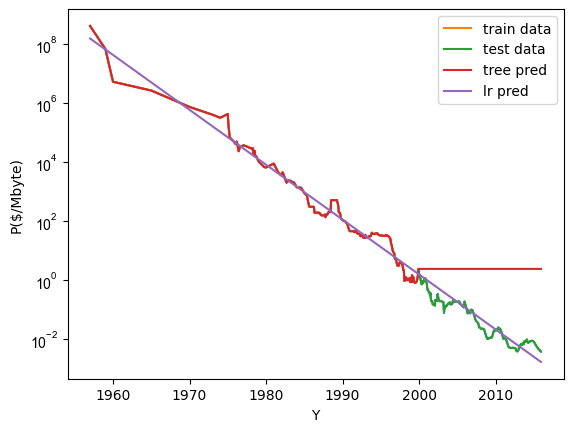

In [82]:
# Decision Tree - Regression
    # regression tree can't extrapolation. == can't pred the poin that out of range of train set

import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Y'); plt.ylabel('P($/Mbyte)')

from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:,np.newaxis]
    # 날짜 특성만 이용
y_train = np.log(data_train.price)
    # log scale

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
    # 지수 적용 > 로그 스케일 되돌림

plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label = 'test data')
plt.semilogy(ram_prices.date, price_tree, label='tree pred')
plt.semilogy(ram_prices.date, price_lr, label='lr pred')
plt.legend()

### Decision Tree - ensemble

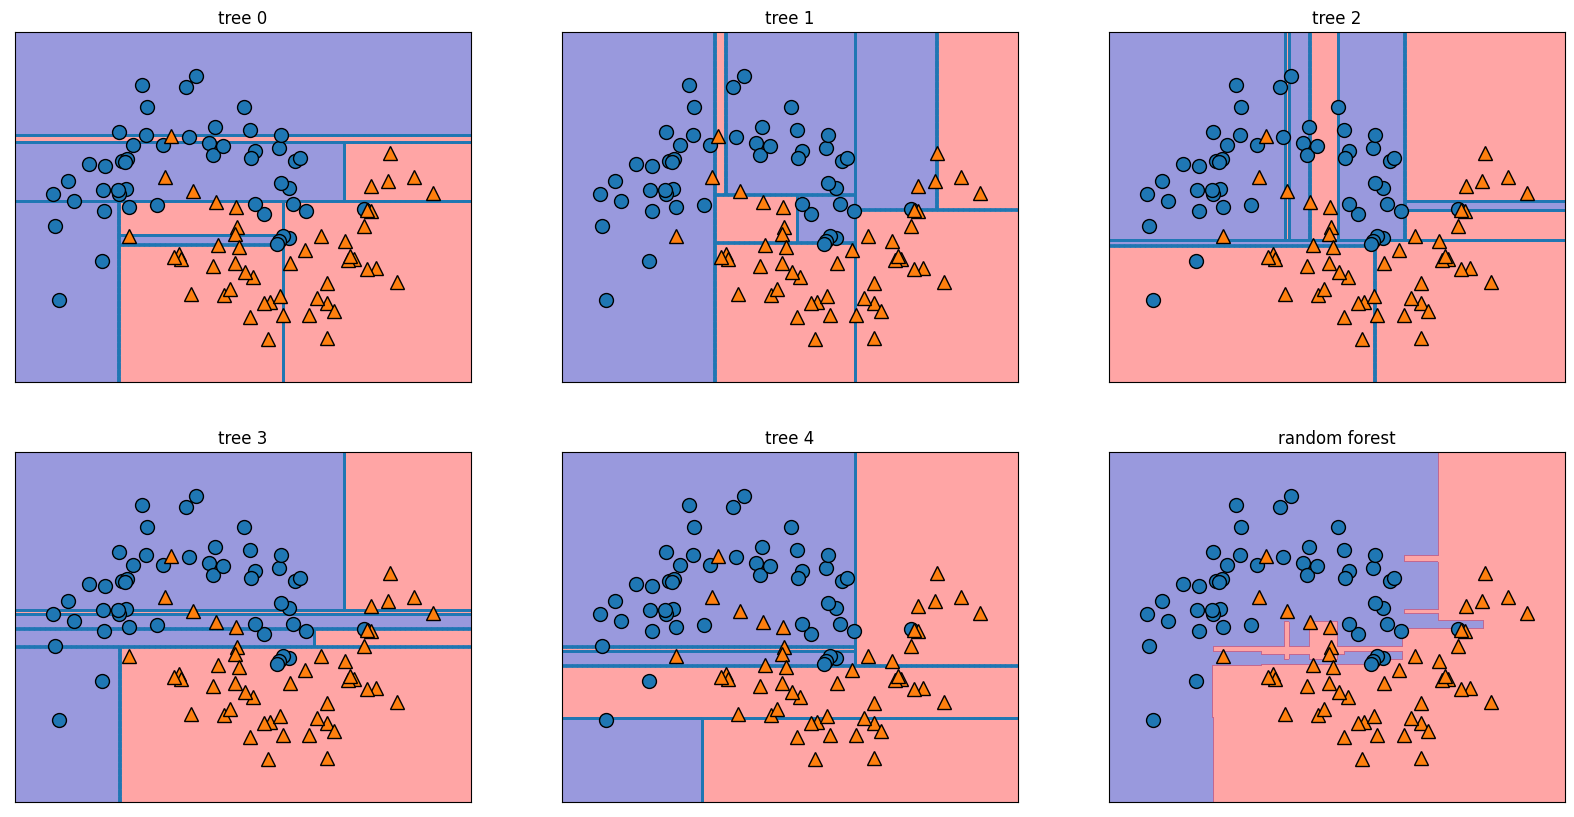

In [6]:
# Random Forest classifier/regreesor
    # n_estimators : default value - 100 : make how many tree
    # max_samples  : bootstrap sample ea
    # max_features : choose how many features. main point parameter!
    # max_depth    : set node's max depth(pre-pruning)
# use bootstrap - random overlap extraction from data point
import matplotlib.pyplot as plt
import mglearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

train set acc: 
 1.0
test set acc: 
 0.972027972027972


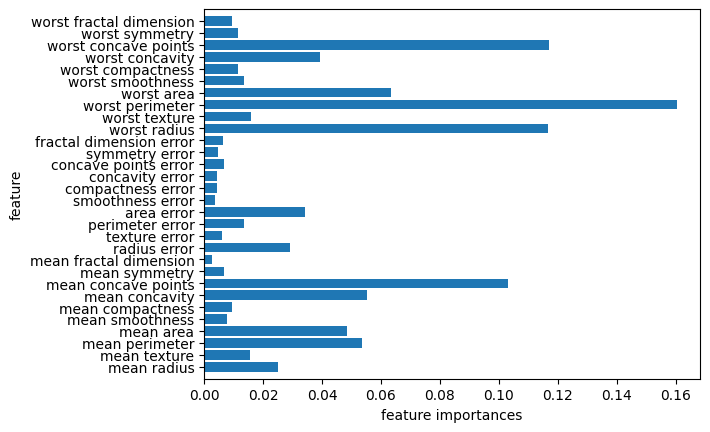

In [10]:
# n_estimators = 100
import numpy as np

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train,y_train)

print('train set acc: \n',forest.score(X_train,y_train))
print('test set acc: \n', forest.score(X_test,y_test))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(forest)

train set acc: 
 1.0
test set acc: 
 0.965034965034965
train set acc: 
 0.9906103286384976
test set acc: 
 0.972027972027972
train set acc: 
 0.9882629107981221
test set acc: 
 0.958041958041958


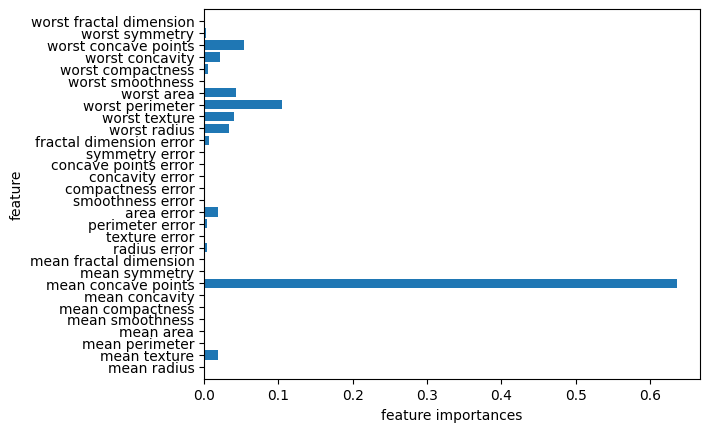

In [13]:
# Gradient Boosting Classifier/ Regressor
    # no random element. so, use powerful pre-pruning
    # redeem pre tree's error > loss func, use gradient descent
        # loss func default == deviance (logistic loss). other options : squared_error, absolute_error
    # use max_depth = 1 ~ 5 > fast pred, use small memory
    # weak learner = concat many simple models

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3, n_estimators=100, learning_rate=0.1)
                                    # default values. ^              ^                     ^
gbrt.fit(X_train, y_train)
print('train set acc: \n', gbrt.score(X_train, y_train))
print('test set acc: \n', gbrt.score(X_test, y_test))
    # train set acc = 1.0 == overfitting. need low learning_rate or pre-pruning

gbrt= GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print('train set acc: \n', gbrt.score(X_train, y_train))
print('test set acc: \n', gbrt.score(X_test, y_test))

gbrt= GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print('train set acc: \n', gbrt.score(X_train, y_train))
print('test set acc: \n', gbrt.score(X_test, y_test))

    # low max_depth is useful than low learning_rate.
plot_feature_importances_cancer(gbrt)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

train set acc: 
 0.9624413145539906
test set acc: 
 0.958041958041958
oob sample acc: 
 0.9483568075117371


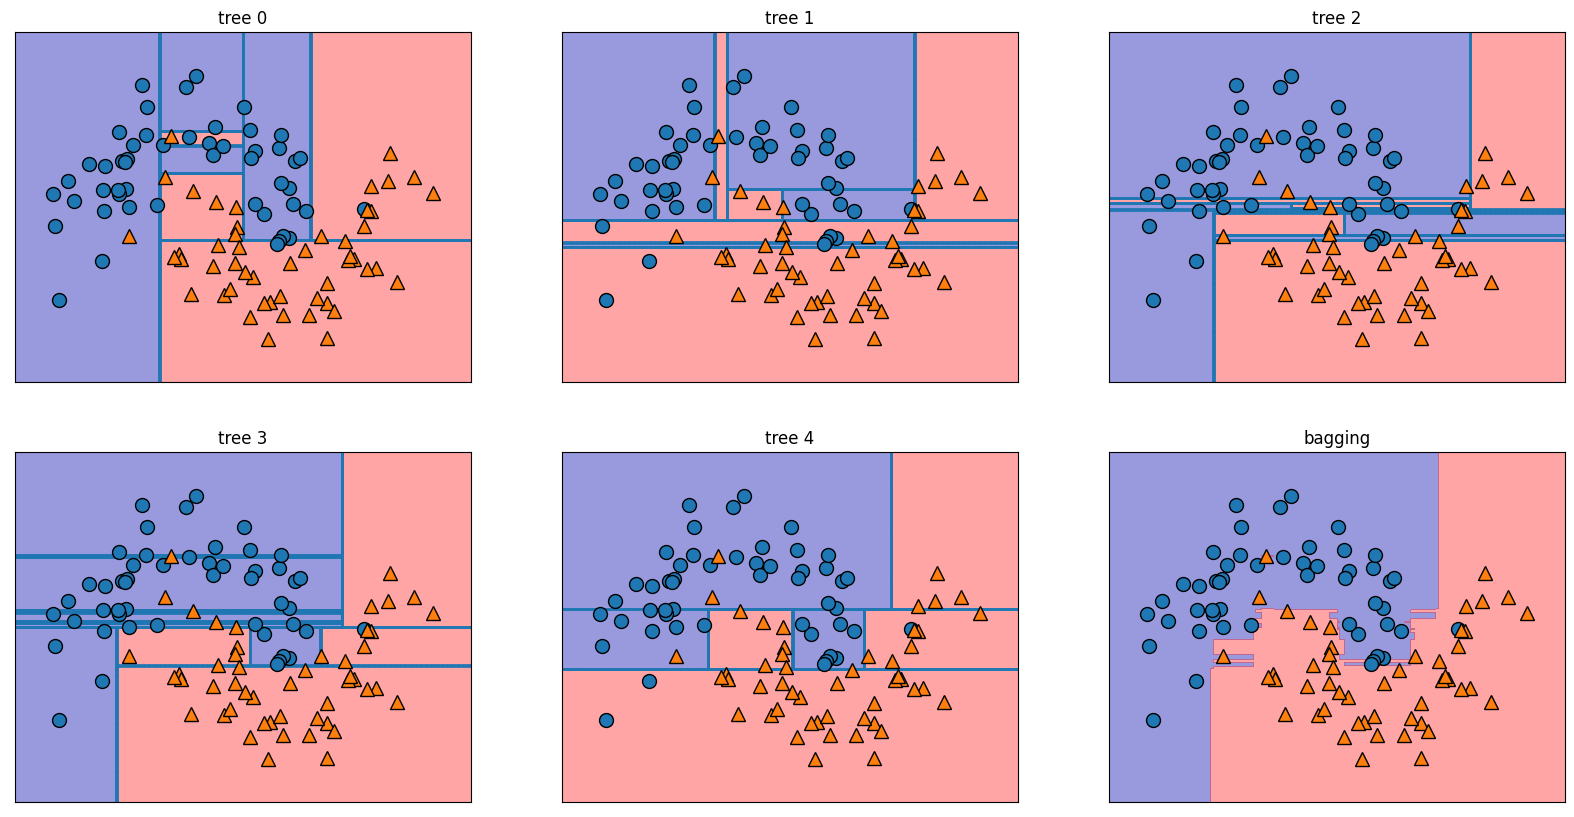

In [16]:
# Bagging - Bootstrap aggregating
    # use bootstrap like random forest
    # max_features = 1.0 (default)
    # max_samples  = 1.0 (default)
    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

    # use logistic regression for classifier
bagging = BaggingClassifier(LogisticRegression(solver = 'liblinear'),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
    # oob_score = evaluate trained model by the sample non comprised in bootstraping : default = False
bagging.fit(Xc_train, yc_train)

print('train set acc: \n', bagging.score(Xc_train,yc_train))
print('test set acc: \n', bagging.score(Xc_test,yc_test))
print('oob sample acc: \n', bagging.oob_score_)

    # use decision tree for classifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

fig, axes = plt.subplots(2,3,figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

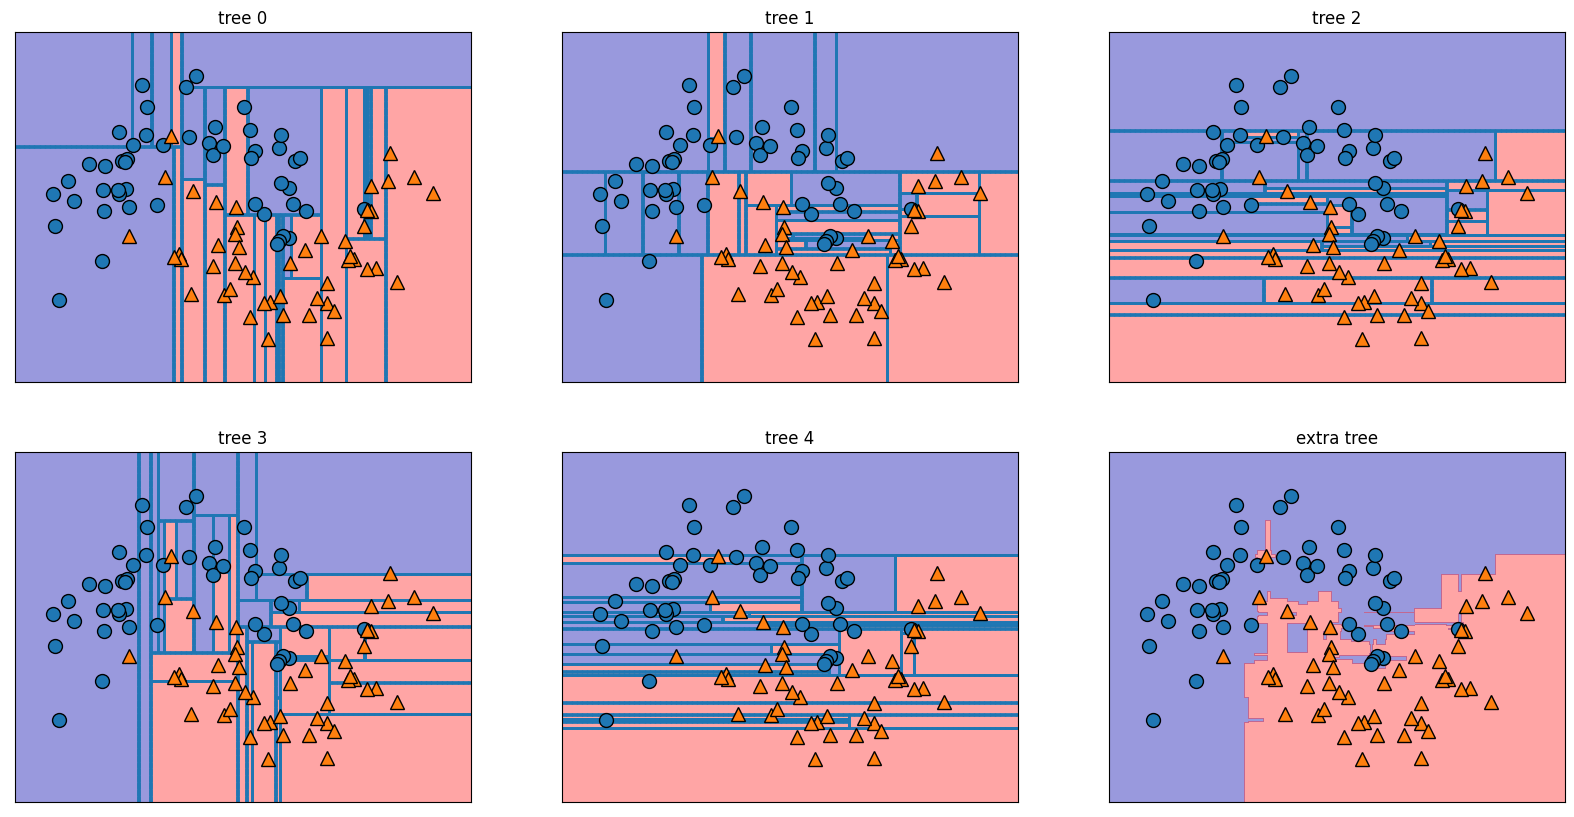

train set acc: 
 1.0
test set acc: 
 0.972027972027972


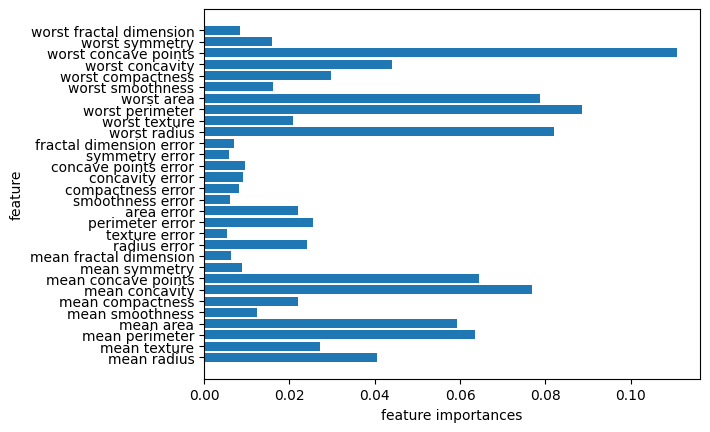

In [21]:
# Extra-Trees
    # use DecisionTreeClassifier(splitter='random')
    # bootstrap=False (default)
    # pred by mean each tree's prob
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('extra tree')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train,yc_train)

print('train set acc: \n', xtree.score(Xc_train,yc_train))
print('test set acc: \n', xtree.score(Xc_test, yc_test))
    # acc is same with random forest
    # 엑스트라 트리는 계산비용이 랜덤 포레스트보다 적지만, 무작위 분할 때문에 일반화 성능을 위해 많은 트리를 필요로 한다.
    # > 랜덤 포레스트가 선호되는 이유

n_features = cancer.data.shape[1]
plt.barh(range(n_features),xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.show()

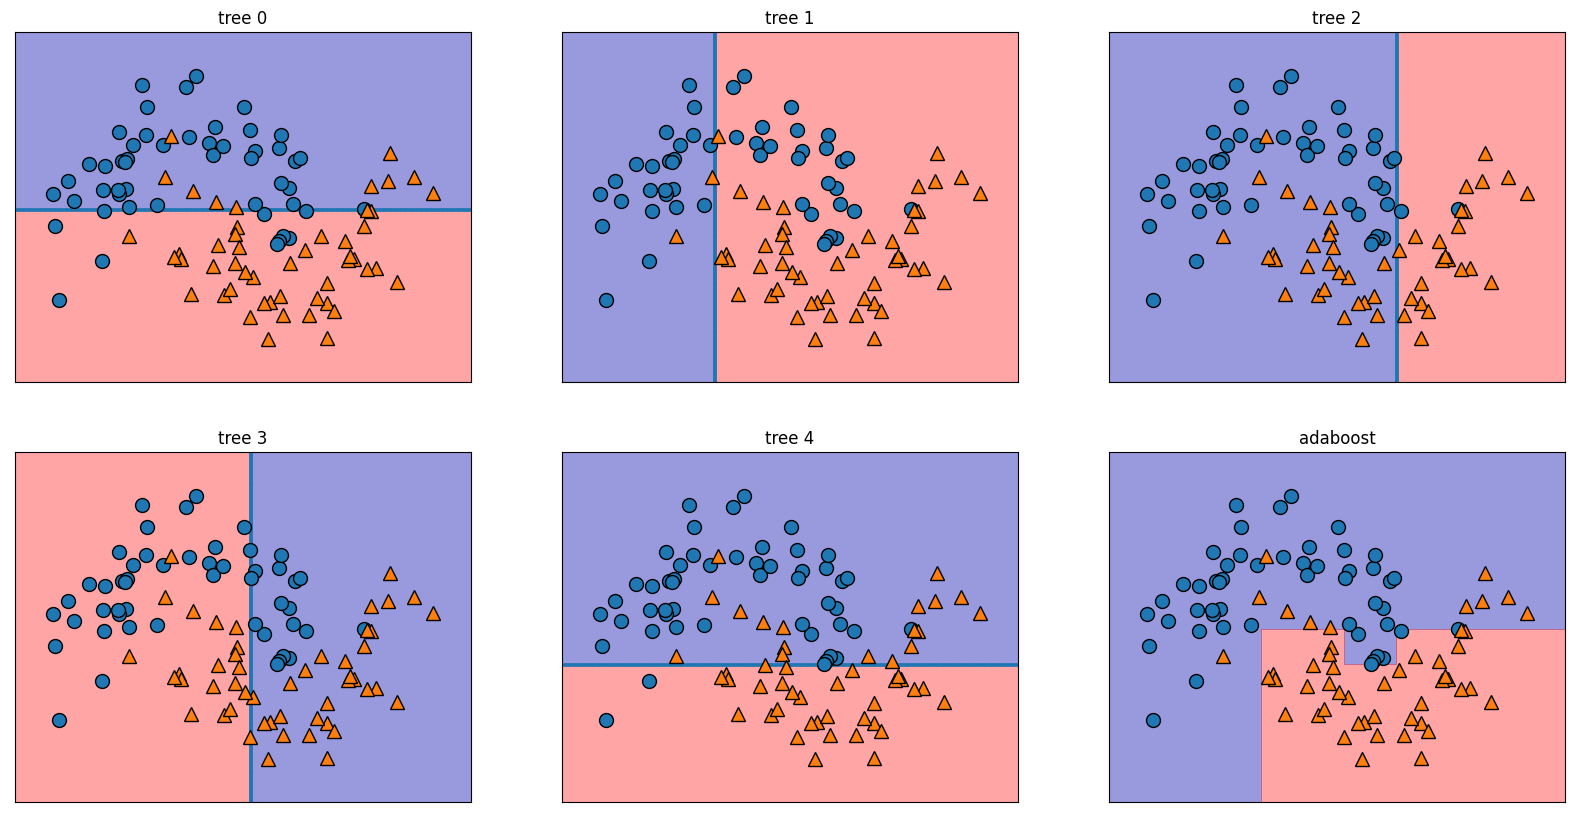

In [22]:
# AdaBoost - Adaptive Boosting
    # use weak learner
    # use DecisionTreeRegressor(max_depth=1) in cls, max_depth=3 in reg

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i , (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('adaboost')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

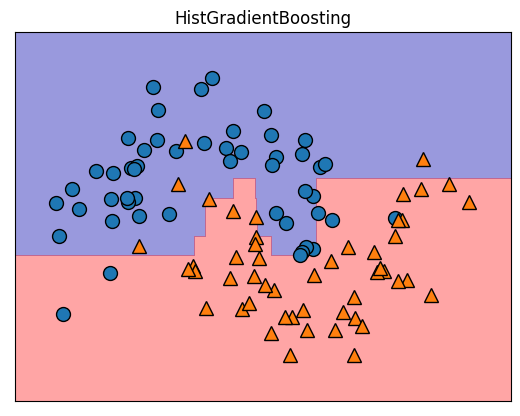

([<matplotlib.axis.YTick at 0x20e163113a0>,
 [Text(0, 0, 'mean radius'),
  Text(0, 1, 'mean texture'),
  Text(0, 2, 'mean perimeter'),
  Text(0, 3, 'mean area'),
  Text(0, 4, 'mean smoothness'),
  Text(0, 5, 'mean compactness'),
  Text(0, 6, 'mean concavity'),
  Text(0, 7, 'mean concave points'),
  Text(0, 8, 'mean symmetry'),
  Text(0, 9, 'mean fractal dimension'),
  Text(0, 10, 'radius error'),
  Text(0, 11, 'texture error'),
  Text(0, 12, 'perimeter error'),
  Text(0, 13, 'area error'),
  Text(0, 14, 'smoothness error'),
  Text(0, 15, 'compactness error'),
  Text(0, 16, 'concavity error'),
  Text(0, 17, 'concave points error'),
  Text(0, 18, 'symmetry error'),
  Text(0, 19, 'fractal dimension error'),
  Text(0, 20, 'worst radius'),
  Text(0, 21, 'worst texture'),
  Text(0, 22, 'worst perimeter'),
  Text(0, 23, 'worst area'),
  Text(0, 24, 'worst smoothness'),
  Text(0, 25, 'worst compactness'),
  Text(0, 26, 'worst concavity'),
  Text(0, 27, 'worst concave points'),
  Text(0, 28, 'w

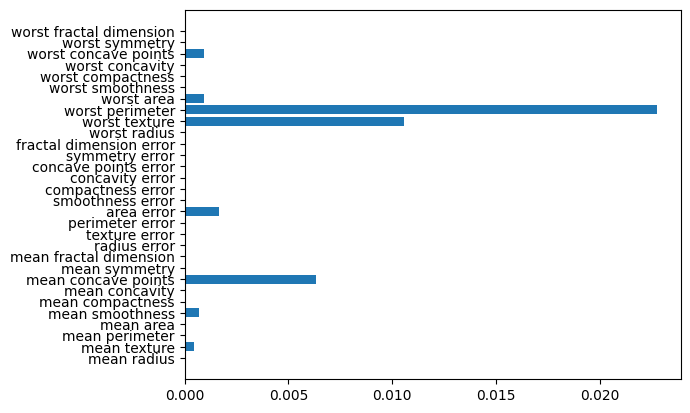

In [28]:
# Hist Gradient Boosting
    # seperate in feature to 256 spaces > 노드 분할시 최적의 분할을 빠르게 찾는다.
    # max_iter : boosting repeat number(= tree ea). default value = 100
    # dont produce feature importances_ but can calcul by permutation_importance
    # 
from sklearn.ensemble import HistGradientBoostingClassifier
hgb= HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train,ym_train)

mglearn.plots.plot_2d_separator(hgb,Xm,fill=True,alpha=.4)
plt.title('HistGradientBoosting')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

from sklearn.inspection import permutation_importance
hgb.fit(Xc_train, yc_train)
result = permutation_importance(hgb,Xc_train,yc_train,n_repeats=10,random_state=42,n_jobs=-1)
plt.barh(range(n_features), result.importances_mean,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)


### Kernelized support vector machines

kernel trick : 데이터를 고차원 공간에 매핑하는 방법

    다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산

    RBF 커널   : 차원이 무한한 특성 공간에 매핑. 모든 차수의 모든 다항식을 고려

svm의 이해 :

두 클래스 사이의 경계에 위치한 일부의 데이터 포인트들만 결정 경계를 만드는 것에 영향을 준다. 이를 서포트 벡터라고 한다.

새로운 데이터 포인트를 예측하기 위해 각 서포트 벡터와의 거리를 측정하며 각 서포트 벡터의 중요도는 훈련에서 학습해 dual_coef_에 저장된다.

K_rbf(x1,x2) = exp( -gamma * ||x1-x2||^2).  gamma : 가우시안 커널의 폭을 제어하는 param. 기본적으로 유클리드 거리를 사용한다.

기본적으로 매개변수 설정과 데이터 스케일에 매우 민감하며, 특히나 입력 특성의 범위가 비슷해야한다.


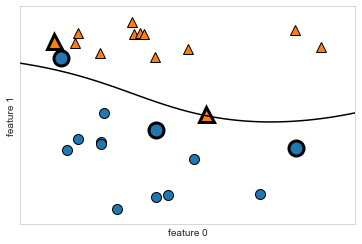

In [64]:
# non_linear decision boundary - SVM(Classifier)
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
    # dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0"); plt.ylabel("feature 1"); plt.show()

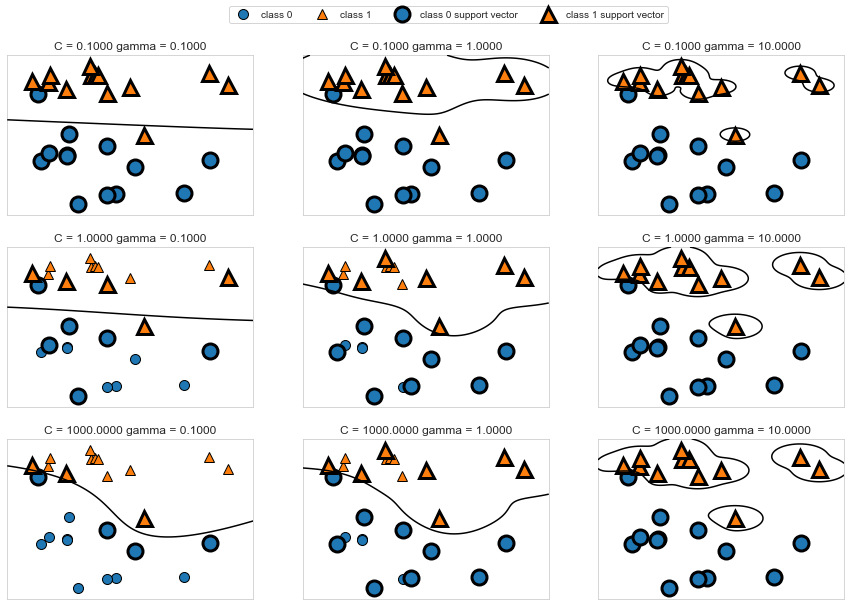

In [66]:
# SVM parameter tuning
    # gamma : gausian kernel 폭의 역수. > 하나의 훈련 샘플이 미치는 영향의 범위를 결정 > 작을수록 데이터 포인트의 영향 범위 증가
    # C     : regularization param. each point's dual_coef_ 값을 제한. > 작을수록 큰 규제
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()  # 이 정도만 해도 cpu 꽤 먹음

train set acc: 
 0.903755868544601
test set acc: 
 0.9370629370629371


Text(0, 0.5, 'feature size')

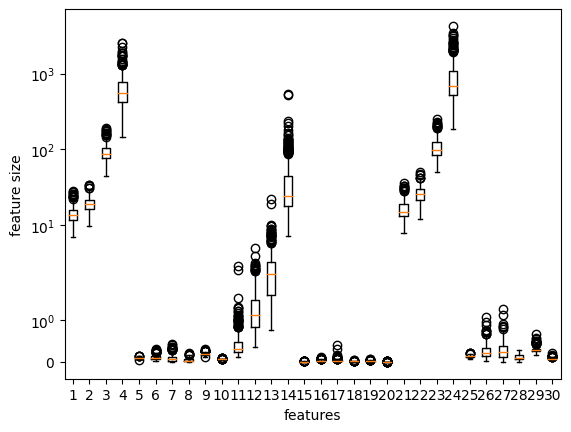

In [31]:
# C=1, gamma = 1/n_features (default values)  RBF SVM
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('train set acc: \n', svc.score(X_train,y_train))
print('test set acc: \n', svc.score(X_test,y_test))
    # underfitting

plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('features')
plt.ylabel('feature size')
    # input feature의 scale이 너무 차이난다.
    # > 전처리 필요

In [32]:
# preprocessing for SVM
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training)/range_on_training
    # (x-x.min)/(x.max - x.min) => 결과는 항상 0~1 사이

X_test_scaled = (X_test - min_on_training)/range_on_training
    # train set의 min과 range를 사용 - 3장에서 설명

svc = SVC()
svc.fit(X_train_scaled,y_train)

print('train set acc: \n', svc.score(X_train_scaled,y_train))
print('test set acc: \n',svc.score(X_test_scaled, y_test))

train set acc: 
 0.9835680751173709
test set acc: 
 0.972027972027972


### NN(Deep Learning)

pre-processing에 신경 써야한다.
SVM처럼 모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 작동한다.

hidden_layer 개수와 each layer's hidden_unit 개수가 중요하다.
 각 은닉층의 유닛 수는 보통 입력 특성의 수와 비슷하게 설정한다.

 + 그냥 내 생각에는 유닛 수를 늘리기보다는 은닉층을 늘리는게 성능향상에 좋아보인다.

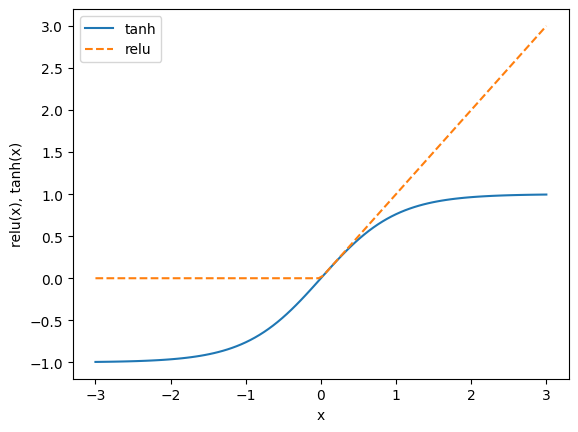

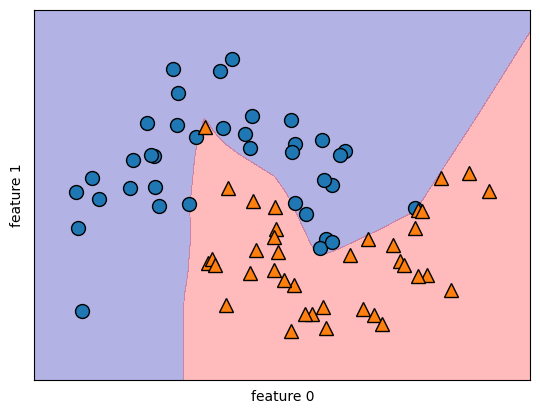

In [33]:
# relu, tanh. Activation Func for non linear.
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x"); plt.ylabel("relu(x), tanh(x)"); plt.show()

# MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
    # X= [x1,x2] == coordinate , y = [0 or 1] == class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
    # hidden_layer_sizes=[100] (default)
        # one hidden layer. have 10 hidden_units.
    # solver = optim algorithm. [sgd, adam, lbfgs] default = adam
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

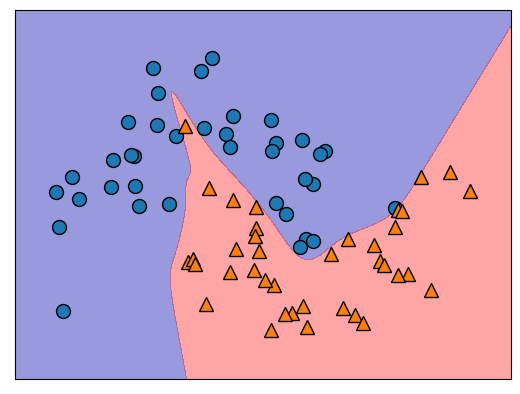

In [47]:
# hidden_layer_sizes =[10,10], activation ='tanh' mlp
    # two hidden layer. each layer have 10 hidden units.
mlp = MLPClassifier(solver ='lbfgs',activation='tanh', random_state=0,hidden_layer_sizes=[10,10],max_iter=1000)
                                    # activation = ['identity', 'logistic', 'relu', 'softmax', 'tanh']. default = relu
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.4)
    # this alpha mean 'transparency'
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

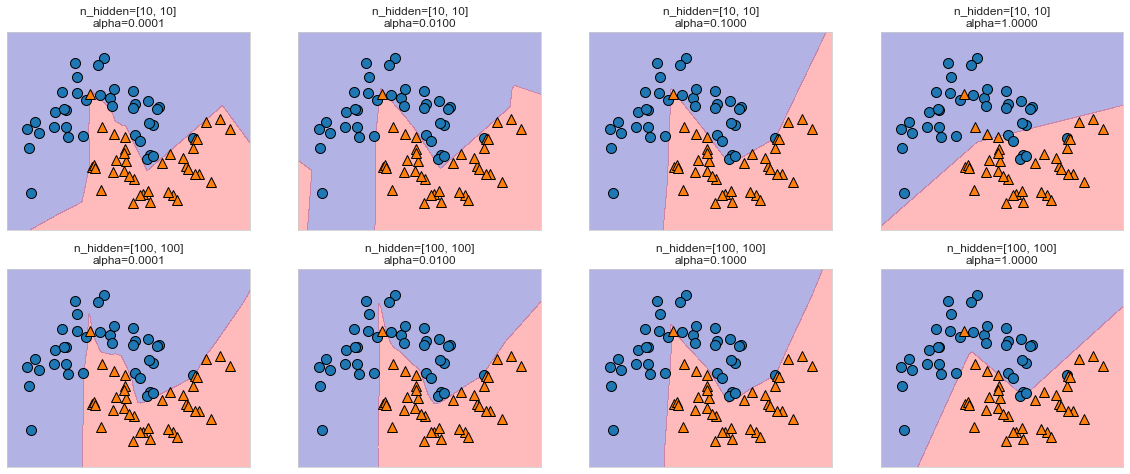

In [69]:
# use L2 regularization mlp
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
                            # this alpha use for L2 regularization
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

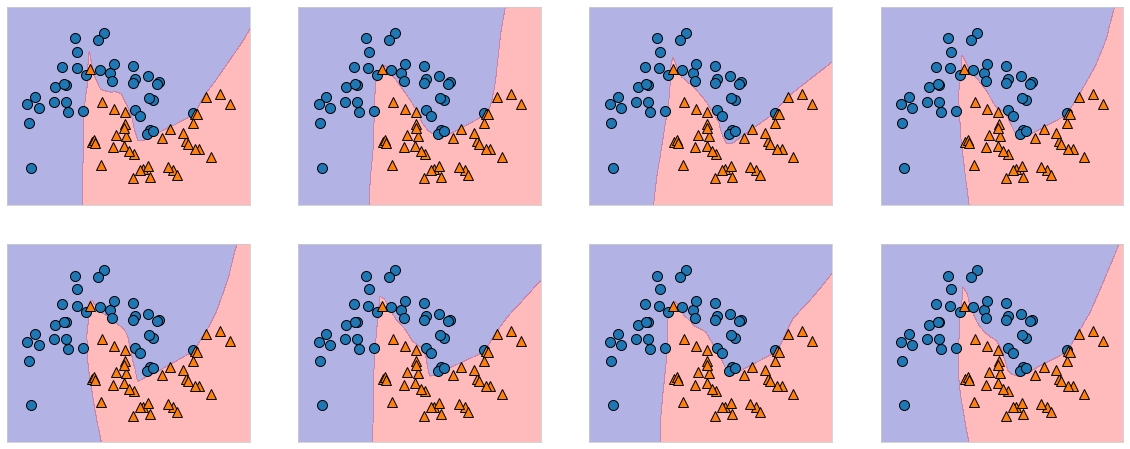

In [70]:
# 초기값에 따른 모델의 변화. (same parameter, different initial value)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [54]:
# like SVC, nn need normalized input feature.
# nomarlize to mean = 0, val =1  == StandardScaler.

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/ std_on_train
X_test_scaled =  (X_test - mean_on_train)/ std_on_train

mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
                    # max_iter = repeat times. for solver adam. default max_iter = 200
                    # default alpha = 0.0001
                        # alpha 1 for generalization
mlp.fit(X_train_scaled,y_train)

print('train set acc: \n',mlp.score(X_train_scaled,y_train))
print('test set acc: \n', mlp.score(X_test_scaled,y_test))

train set acc: 
 0.9882629107981221
test set acc: 
 0.972027972027972


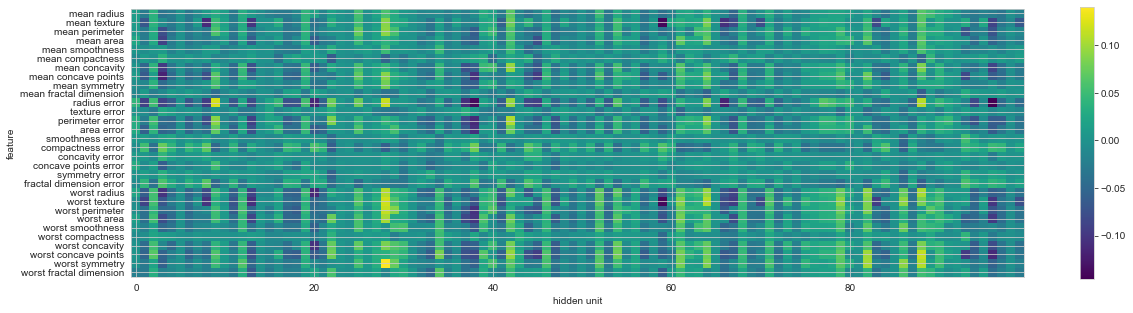

In [73]:
# check the coef for what is learned
    # these coefs that have a value near by abs(0) are not important than others or not input properly to nn  
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp.fit(X_train_scaled, y_train)
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit"); plt.ylabel("feature")
plt.colorbar(); plt.show()

### 분류 예측의 불확실성 추정

X_test.shape: (25, 2)
decision func shape: (25,)
decision function: [ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]
임계치와 결정 함수 결과 비교: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
pred: 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
pred equal gbrt.predict?: True
max: 4.289866423997604, min: -7.6909717851019


C:\Users\rjsgh\AppData\Local\Temp\ipykernel_11560\2654707513.py:47: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


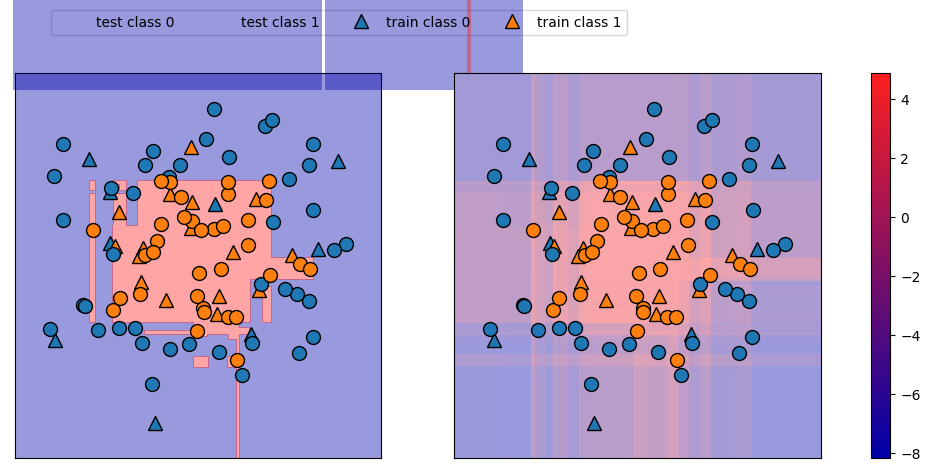

In [78]:
# decision_function

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.25, factor=.5,random_state=1)

y_named = np.array(['blue','red'])[y]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named,y,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

# in binary classification, decision_function's return shape is (n_samples,)
print('X_test.shape:', X_test.shape)
print('decision func shape:', gbrt.decision_function(X_test).shape)
print('decision function:', gbrt.decision_function(X_test)[:6])
    # 이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도.
    # 양수는 양성 클래스, 음수는 음성(다른) 클래스를 의미.
    # 즉 결정 함수의 부호만으로 True, False를 구분가능

print('임계치와 결정 함수 결과 비교: \n', gbrt.decision_function(X_test)>0)
print('pred: \n', gbrt.predict(X_test))

# 이진 분류에서 classes_ 속성의 첫 번째는 음성, 두 번째는 양성. == [n, p]

greater_zero = (gbrt.decision_function(X_test)>0).astype(int)
pred = gbrt.classes_[greater_zero]
print('pred equal gbrt.predict?:', np.all(pred == gbrt.predict(X_test)))

# decision func 의 최소 최대값은 데이터와 모델 param에 따라 다르다.
decision_func = gbrt.decision_function(X_test)
print('max: {}, min: {}'.format(np.max(decision_func),np.min(decision_func)))

fig, axes = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_img = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)

cbar = plt.colorbar(scores_img,ax=axes.tolist())
            # axes.tolist() =
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0','test class 1','train class 0','train class 1'],ncol=4,loc=(.1,1.1))


확률 값 형태: (25, 2)
예측 확률: 
 [[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


C:\Users\rjsgh\AppData\Local\Temp\ipykernel_11560\2227092124.py:18: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


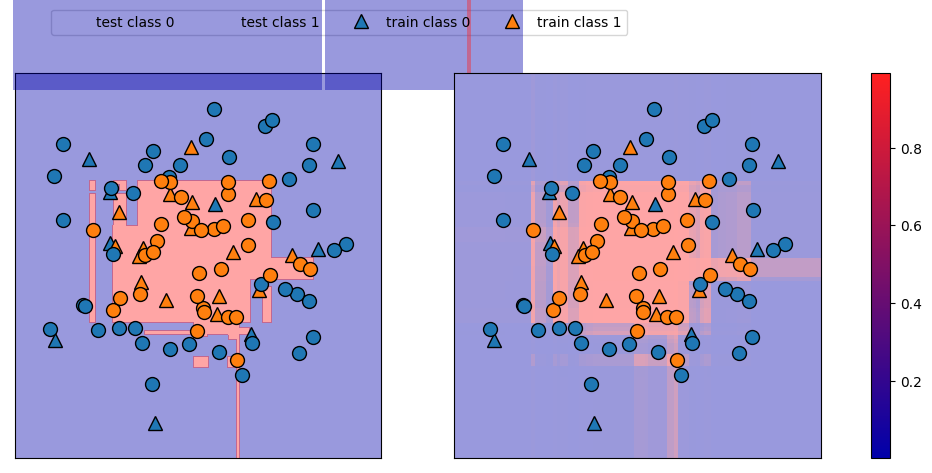

In [83]:
# predict_proba
# each class 에 대한 확률. 이진분류에서 항상 (n_samples,2)로 출력된다.
print('확률 값 형태:',gbrt.predict_proba(X_test).shape)
print('예측 확률: \n', gbrt.predict_proba(X_test[:6]))
    # 두 클래스 중 하나는 50% 이상의 확신을 보인다. 정확히 50대 50이면 랜덤으로 하나 선택함.

fig, axes = plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_img = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')
                            # function default value = decision_function
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)

cbar = plt.colorbar(scores_img,ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0','test class 1','train class 0','train class 1'],ncol=4,loc=(.1,1.1))

In [87]:
# multi classification에서의 불확실성
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=.01,random_state=0)
gbrt.fit(X_train,y_train)

print('결정함수의 형태:',gbrt.decision_function(X_test).shape)
        # (n_samples, n_classes)
print('결정 함수 결과:',gbrt.decision_function(X_test[:6,:]))
        # np.argmax 로 인덱스 반환을 통한 클래스 예측이 가능하다.

print('예측 확률: \n', gbrt.predict_proba(X_test)[:6])
        # 마찬가지로 np.argmax 사용
print('가장 큰 예측 확률의 인덱스: \n', np.argmax(gbrt.predict_proba(X_test),axis=1))
print('pred: \n', gbrt.predict(X_test))

결정함수의 형태: (38, 3)
결정 함수 결과: [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
예측 확률: 
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
가장 큰 예측 확률의 인덱스: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
pred: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [92]:
# check the class name
named_target = iris.target_names[y_train]
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter=1000)
logreg.fit(X_train,named_target)
print('train data에 있는 클래스 종류:',logreg.classes_)
print('pred:',logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test),axis=1)
print('가장 큰 결정 함수의 인덱스: \n', argmax_dec_func)
print('인덱스와 클래스의 연결: \n', logreg.classes_[argmax_dec_func][:10])
    # pred와 인덱스 연결의 결과가 같은지 확인

train data에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
pred: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
인덱스와 클래스의 연결: 
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
